## 1.引入包

In [30]:
#-*- coding=utf-8 -*-
import pandas as pd
import pylab
import collections
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from sklearn import datasets, linear_model
import datetime

## 2.按小时画直方图

In [38]:
def hour_hist(path,y):
    df = pd.read_csv(path)
    pieces = dict(list(df.groupby('actor')['created_time']))
    hours = []
    for k in pieces:
        a = sorted(pieces[k])
        b = [datetime.datetime.fromtimestamp(t) for t in a]
        for time in b:
            hours.append(time.hour+1)
    draw_hist(hours,'','Hour','number',0,25,0.0,y)

## 3.画直方图

In [20]:
# 参数依次为list,抬头,X轴标签,Y轴标签,XY轴的范围
def draw_hist(myList,Title,Xlabel,Ylabel,Xmin,Xmax,Ymin,Ymax):
    plt.hist(myList,100)
    plt.xlabel(Xlabel)
    plt.xlim(Xmin,Xmax)
    plt.ylabel(Ylabel)
    plt.ylim(Ymin,Ymax)
    plt.title(Title)
    plt.show()

## 4.双对数坐标下画图并线性拟合

In [182]:
def drawpic(X,pY,l,r):
    _logX = []
    _logpY = []

    print len(X)
    for x, y in zip(X,pY): #这里可以调整
        _logX.append([float(np.log10(x))])
        _logpY.append([float(np.log10(y))])
    # 模型拟合
    regr = linear_model.LinearRegression()
    regr.fit(_logX[l:r], _logpY[l:r])
    # 模型结果与得
    print('Coefficients:', regr.coef_,)
    print("Intercept:",regr.intercept_)
# The mean square error
    print("Residual sum of squares: %.8f"
      % np.mean((regr.predict(_logX) - _logpY) ** 2))  # 残差平方和

    # 可视化
    #plt.title("following count loglog probability distribution")
    plt.xlabel("time span")
    plt.ylabel("p(t)")
    
    plt.plot(X,pY,".",  color='blue')
    plt.plot(X[l:r], X[l:r]**regr.coef_[0][0]*np.exp(regr.intercept_[0]), "r-",linewidth=2)
    #print plt.yticks()
    #plt.yticks(plt.yticks()[0],['$10^%f$'%w for w in range(3)]) 
    #plt.yticks()[0]
    plt.xscale('log'); plt.yscale('log')
    plt.text(100, 0.01, "Slope="+ str(round(regr.coef_[0][0],2)) ,fontsize=10);
    # plt.xticks(())
    # plt.yticks(())
    plt.show()

## 5.主程序

### 5.1 活跃用户半年内回答情况（按小时）直方图

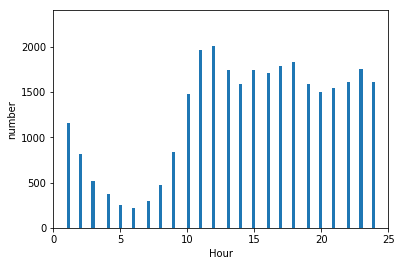

In [163]:
hour_hist(r'../数据/论文用/活跃用户半年内回答情况.csv',2400)

### 5.2 活跃用户半年内动态情况（按小时）直方图

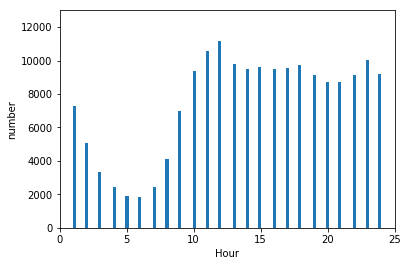

In [165]:
hour_hist(r'../数据/论文用/活跃用户半年内动态情况.csv',13000)

### 5.3 双对数坐标下活跃用户半年内回答时间间隔

1439
('Coefficients:', array([[-0.68444332]]))
('Intercept:', array([-1.53899079]))
Residual sum of squares: 0.04418398


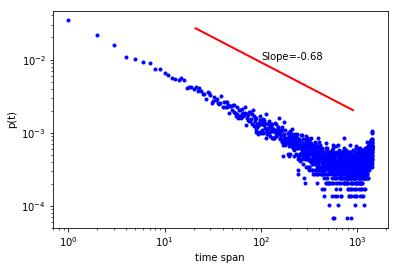

In [183]:
df = pd.read_csv(r'../数据/论文用/活跃用户半年内回答情况.csv')
pieces = dict(list(df.groupby('actor')['created_time']))
hours = []
second_span = []
minute_span = []
hour_span = []
day_span = []
for k in pieces:
    a = sorted(pieces[k])
    format_time = [datetime.datetime.fromtimestamp(t) for t in a]
    for i in range(len(format_time)-1):
        second_span.append((format_time[i+1] - format_time[i]).seconds)
        minute_span.append((format_time[i+1] - format_time[i]).seconds/60)
        hour_span.append((format_time[i+1] - format_time[i]).seconds/3600)
        day_span.append((format_time[i+1] - format_time[i]).days)

feature_count_pairs = collections.Counter(minute_span).most_common()
feature_value = zip(*feature_count_pairs)[0]
count = zip(*feature_count_pairs)[1]
from operator import itemgetter, attrgetter
sorted_pairs = sorted(feature_count_pairs, key=itemgetter(0))
X  = zip(*sorted_pairs)[0]
# Normalize the data to a proper PDF
Y = zip(*sorted_pairs)[1]
pY = [y/float(sum(Y)) for y in zip(*sorted_pairs)[1]]

drawpic(np.array(X[1:]),np.array(pY[1:]),20,900)

### 5.4 活跃用户半年内回答数的人数分布

In [185]:
df = pd.read_csv(r'../数据/论文用/活跃用户答案汇总.csv')

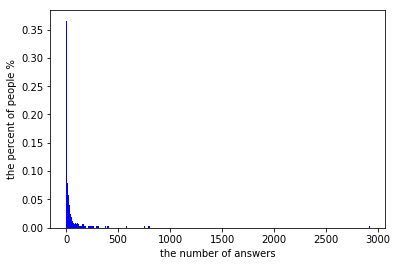

In [186]:
feature_count_pairs = collections.Counter(df['count(*)']).most_common()
feature_value = zip(*feature_count_pairs)[0]
count = [c/32827.0*100 for c in zip(*feature_count_pairs)[1]]
answes = list(df['count(*)'])
plt.bar(feature_value,count,10,color="blue")  
plt.xlabel("the number of answers")  
plt.ylabel("the percent of people %")  
#plt.title("bar chart")  
plt.show()

In [187]:
zip(feature_value,count)

[(1.0, 0.36555274621500594),
 (2.0, 0.24979437658025405),
 (3.0, 0.18277637310750297),
 (4.0, 0.15840619002650258),
 (6.0, 0.13098973406037712),
 (7.0, 0.12489718829012703),
 (5.0, 0.09748073232400159),
 (8.0, 0.09138818655375149),
 (9.0, 0.07920309501325129),
 (10.0, 0.07615682212812624),
 (11.0, 0.07615682212812624),
 (15.0, 0.07615682212812624),
 (12.0, 0.0670180034727511),
 (14.0, 0.06092545770250098),
 (13.0, 0.05787918481737594),
 (19.0, 0.05787918481737594),
 (29.0, 0.039601547506625645),
 (16.0, 0.03350900173637555),
 (20.0, 0.03350900173637555),
 (21.0, 0.03350900173637555),
 (26.0, 0.03350900173637555),
 (31.0, 0.03350900173637555),
 (17.0, 0.03046272885125049),
 (18.0, 0.027416455966125443),
 (24.0, 0.027416455966125443),
 (25.0, 0.024370183081000397),
 (27.0, 0.024370183081000397),
 (33.0, 0.024370183081000397),
 (38.0, 0.024370183081000397),
 (22.0, 0.0182776373107503),
 (36.0, 0.0182776373107503),
 (53.0, 0.0182776373107503),
 (28.0, 0.015231364425625246),
 (30.0, 0.01523